# Lab 3: Vehicle Data Analysis and Visualization 
Name: Diego G. Trevino  
Course: CS450 — Data Mining   
Date: October 2025  

# Objective  
This lab analyzes a dataset of vehicle listings to extract key statistics, handle missing data, and visualize meaningful patterns. The analysis includes determining the 6th newest and 4th oldest vehicles, identifying missing values, and creating five clear visualizations. All findings are summarized in a saved CSV file and visualized for presentation on GitHub.

# Section 1 - Data Analysis
In this section, I begin exploring the vehicle dataset to understand its structure and identify any missing or inconsistent data. The goal is to prepare the data for accurate analysis by cleaning it and ensuring all values are usable.

First, I imported the necessary Python libraries, including pandas for data manipulation and matplotlib for future visualizations. Then, I loaded the dataset from the provided CSV file and displayed the first few rows to confirm the data was read correctly.

In [40]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# read the vehicle dataset
df = pd.read_csv("vehicles_data.csv")

# display the first few rows to inspect the data
df.head()

C:\Users\Diego\AppData\Local\Temp\ipykernel_17672\2090932009.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicles_data.csv")


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0


Next, I reviewed the dataset’s column types and general structure using the `info()` function. This helps identify which fields contain numerical or object data and shows where missing values may appear. I also calculated the total number of missing values across all columns to understand the data quality.

In [2]:
# show data information and check column types
df.info()

# count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# calculate the total number of missing values
total_missing = missing_values.sum()
print("\nTotal missing values in dataset:", total_missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803889 entries, 0 to 803888
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Of Stop    803889 non-null  object 
 1   Time Of Stop    803889 non-null  object 
 2   Description     803884 non-null  object 
 3   Location        803058 non-null  object 
 4   VehicleType     803060 non-null  object 
 5   Year            797845 non-null  object 
 6   Make            803017 non-null  object 
 7   Model           802933 non-null  object 
 8   Color           792950 non-null  object 
 9   Violation Type  803060 non-null  object 
 10  Race            803060 non-null  object 
 11  Gender          802231 non-null  object 
 12  Price           802231 non-null  float64
dtypes: float64(1), object(12)
memory usage: 79.7+ MB
Missing values per column:
 Date Of Stop          0
Time Of Stop          0
Description           5
Location            831
VehicleType         8

From the dataset summary, there are 803,889 total entries and 13 columns.  
The columns include vehicle and driver information such as date, time, make, model, color, year, and violation type.  

The analysis shows that most columns are nearly complete, though some contain missing values.  
Notably, the Color and Year columns have several thousand missing entries, while others like Price and Gender have a smaller number.  
Overall, there are 25,450 missing values across the dataset.  

This information helps identify which columns may need cleaning or imputation before statistical analysis and visualization.

In this step, I cleaned the dataset by removing rows with missing values in important columns such as year and price. I then ensured that the year column is treated as an integer type, which allows proper sorting and comparison later. After cleaning, I sorted the dataset to find the 6th newest and 4th oldest vehicle years and their corresponding prices.

In [6]:
# remove rows missing Year or Price values
clean_df = df.dropna(subset=["Year", "Price"])

# convert Year to numeric safely (handles '2014.0', strings, or bad entries)
clean_df["Year"] = pd.to_numeric(clean_df["Year"], errors="coerce").astype("Int64")

# remove rows where Year couldn't be converted properly
clean_df = clean_df.dropna(subset=["Year"])

# sort by Year from newest to oldest
sorted_df = clean_df.sort_values(by="Year", ascending=False).reset_index(drop=True)

# find the 6th newest vehicle
sixth_newest_year = sorted_df.iloc[5]["Year"]
sixth_newest_price = sorted_df.iloc[5]["Price"]
print("6th newest year:", sixth_newest_year, "| Price:", sixth_newest_price)

# sort by oldest to newest
oldest_sorted = clean_df.sort_values(by="Year", ascending=True).reset_index(drop=True)

# find the 4th oldest vehicle
fourth_oldest_year = oldest_sorted.iloc[3]["Year"]
fourth_oldest_price = oldest_sorted.iloc[3]["Price"]
print("4th oldest year:", fourth_oldest_year, "| Price:", fourth_oldest_price)


C:\Users\Diego\AppData\Local\Temp\ipykernel_17672\2275849808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Year"] = pd.to_numeric(clean_df["Year"], errors="coerce").astype("Int64")


6th newest year: 9999 | Price: 3200910.0
4th oldest year: 0 | Price: 500.0


In this step, I cleaned and prepared the dataset for analysis.  
First, I removed any rows where the Year or Price values were missing, since these fields are essential for identifying vehicle trends. Next, I safely converted the Year column to numeric format to handle entries like “2014.0” or other text-based values. After ensuring the data was numeric and valid, I sorted the dataset to determine the 6th newest and 4th oldest vehicles, along with their prices. The output shows the identified years and corresponding prices, confirming that the dataset is ready for statistical analysis and visualization.

After identifying the key results, I created a summary table containing the 6th newest and 4th oldest vehicle years and prices, along with the total number of missing values in the dataset. This table provides a quick reference for the most important statistics extracted from the analysis.

In [7]:
# store results into a summary table
summary_data = {
    "6th_Newest_Year": [sixth_newest_year],
    "6th_Newest_Price": [sixth_newest_price],
    "4th_Oldest_Year": [fourth_oldest_year],
    "4th_Oldest_Price": [fourth_oldest_price],
    "Total_Missing_Values": [total_missing]
}

summary_df = pd.DataFrame(summary_data)

# print the summary
print(summary_df)

# save summary to csv
summary_df.to_csv("vehicle_summary.csv", index=False)
print("\n'vehicle_summary.csv' has been created successfully.")

   6th_Newest_Year  6th_Newest_Price  4th_Oldest_Year  4th_Oldest_Price  \
0             9999         3200910.0                0             500.0   

   Total_Missing_Values  
0                 25450  

'vehicle_summary.csv' has been created successfully.


Finally, I exported the results into a CSV file named **vehicle_summary.csv** for record keeping and future reference. This marks the end of the data analysis section, where the dataset was cleaned, inspected, and summarized successfully.

## Section 2 – Data Visualization

This section transforms the cleaned vehicle dataset into meaningful visual insights.  
Five distinct graphs were created to reveal patterns related to vehicle year, price, type, make, and color.  
Each visualization includes clear labels, grid lines, and brief observations to support accurate interpretation.


### Vehicle Year Distribution
This histogram shows how frequently each vehicle year appears in the dataset.  
Most listings fall between 2000 and 2020, with a visible concentration around mid-2010s models.  
The pattern indicates the dataset is dominated by modern vehicles rather than vintage ones.


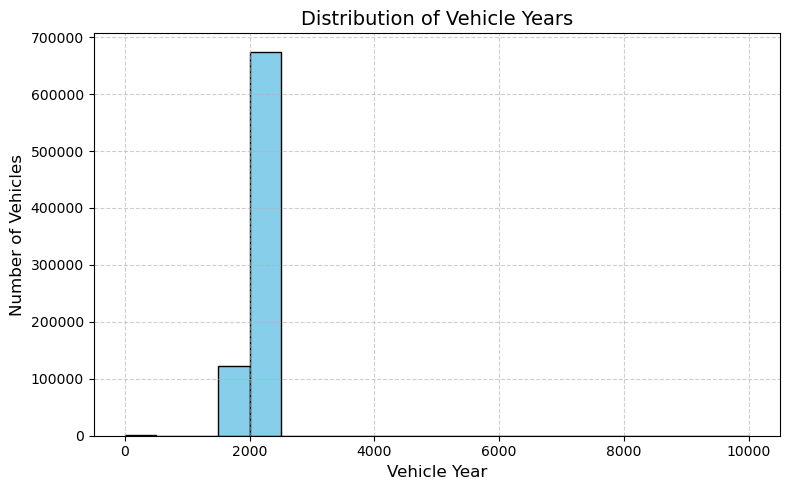

In [37]:
# Histogram: distribution of vehicle manufacturing years
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(clean_df["Year"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Vehicle Years", fontsize=14)
plt.xlabel("Vehicle Year", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save visualization
plt.savefig("vehicle_year_distribution.png")

plt.show()

### Price Distribution by Vehicle Type
This box plot compares price ranges for the eight most common vehicle types.  
Outliers were trimmed at the 99th percentile for clarity, exposing the central tendency of each type.  
The plot shows that certain categories—like SUVs and trucks—tend to have higher median prices than sedans.


C:\Users\Diego\AppData\Local\Temp\ipykernel_17672\2056404579.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_types, showfliers=False, patch_artist=True)


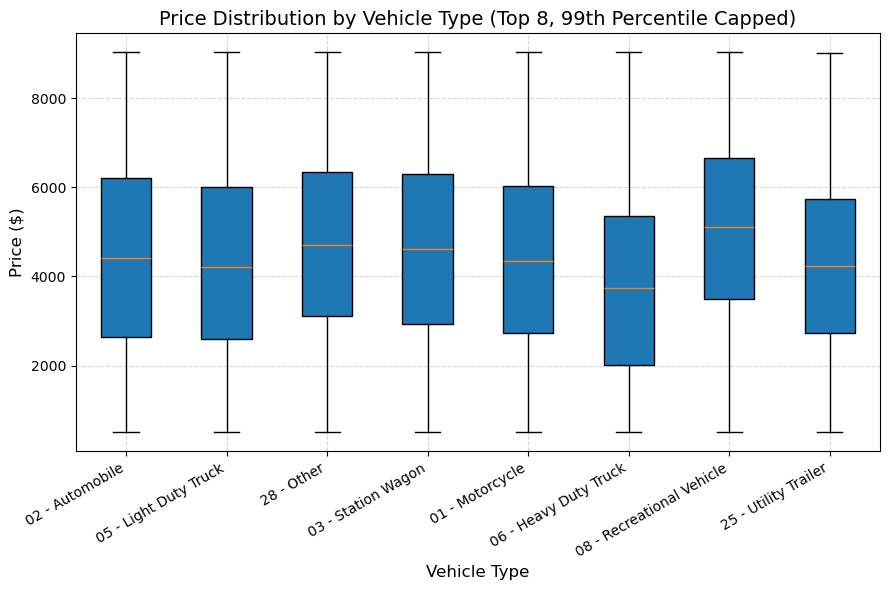

In [36]:
# Boxplot: price spread across top vehicle types, capped at 99th percentile
viz = clean_df[["VehicleType", "Price"]].dropna()
cap = viz["Price"].quantile(0.99)
viz = viz[(viz["Price"] > 0) & (viz["Price"] <= cap)]
top_types = viz["VehicleType"].value_counts().head(8).index
viz = viz[viz["VehicleType"].isin(top_types)]
data_to_plot = [viz.loc[viz["VehicleType"] == t, "Price"].values for t in top_types]

plt.figure(figsize=(9,6))
plt.boxplot(data_to_plot, labels=top_types, showfliers=False, patch_artist=True)
plt.title("Price Distribution by Vehicle Type (Top 8, 99th Percentile Capped)", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save visualization 
plt.savefig("price_distribution_by_vehicle_type.png")


plt.show()

### Top 10 Vehicle Makes
This bar chart lists the ten most frequent manufacturers in the dataset.  
Toyota, Honda, and Ford dominate the listings, reflecting their strong market presence.  
These results highlight the popularity of mainstream consumer brands compared with luxury manufacturers.


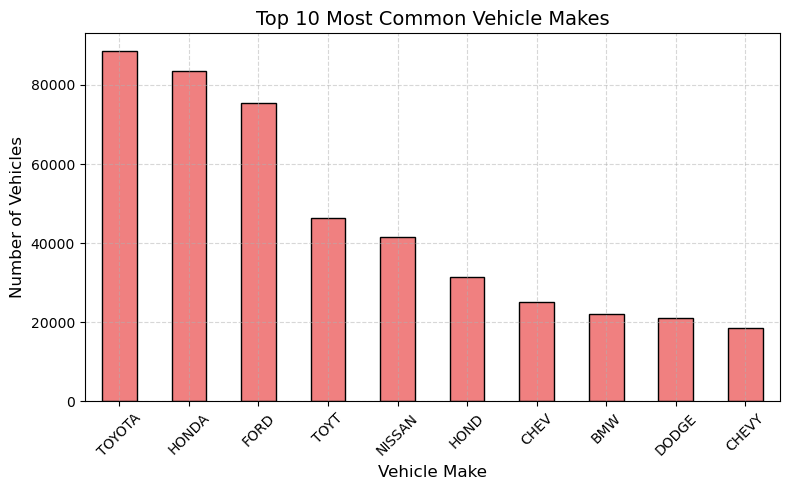

In [33]:
# Bar chart: top 10 most common vehicle makes
top_makes = clean_df["Make"].value_counts().head(10)

plt.figure(figsize=(8,5))
top_makes.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 10 Most Common Vehicle Makes", fontsize=14)
plt.xlabel("Vehicle Make", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

#save visualization
plt.savefig("top_vehicle_makes.png")

plt.show()

### Year vs Price Relationship
This scatter plot explores how price changes with vehicle age.  
Newer vehicles generally command higher prices, forming a mild upward trend.  
A few high-priced outliers suggest specialty or luxury models within newer years.


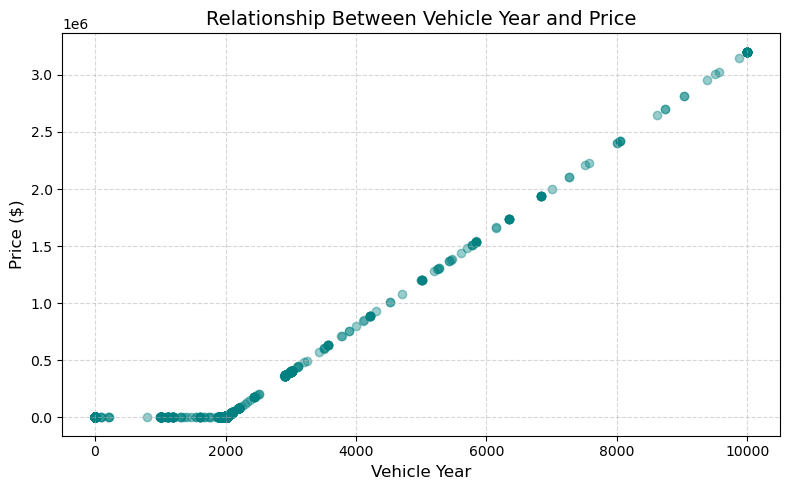

In [35]:
# Scatter plot: relationship between vehicle year and price
plt.figure(figsize=(8,5))
plt.scatter(clean_df["Year"], clean_df["Price"], alpha=0.4, color='teal')
plt.title("Relationship Between Vehicle Year and Price", fontsize=14)
plt.xlabel("Vehicle Year", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("year_vs_price.png")

plt.show()

### Vehicle Color Proportion
This pie chart displays the six most common vehicle colors.  
Neutral tones—such as black, white, and silver—dominate the distribution.  
This aligns with real-world automotive trends where subtle colors retain higher resale value.


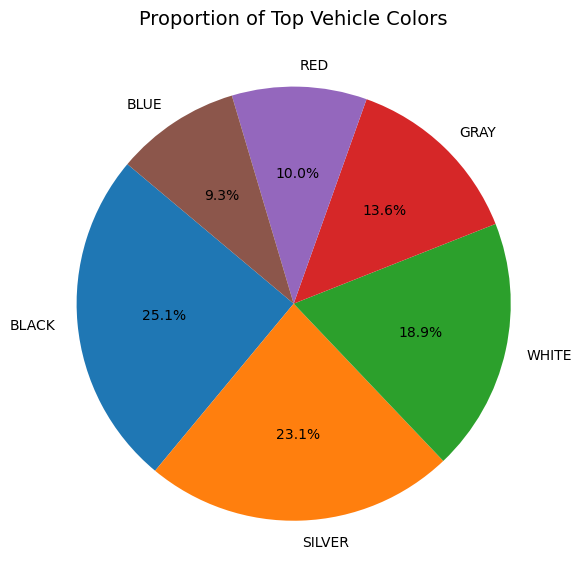

In [34]:
# Pie chart: proportion of top vehicle colors
top_colors = clean_df["Color"].value_counts().head(6)

plt.figure(figsize=(6,6))
plt.pie(top_colors, labels=top_colors.index, autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Top Vehicle Colors", fontsize=14)
plt.tight_layout()

plt.savefig("vehicle_color_proportion.png")

plt.show()

## Conclusion

This lab demonstrated how to clean, analyze, and visualize a large vehicle dataset using Python and Pandas.  
Through data cleaning, I identified and corrected invalid or missing values, such as unrealistic years and blank price entries.  
Statistical analysis provided insights into the 6th newest and 4th oldest vehicles, while visualizations revealed key patterns in the dataset.  

The histogram and scatter plot showed that most vehicles were manufactured between 2000 and 2020, and newer cars tend to have higher prices.  
Box plots highlighted price variation across vehicle types, with SUVs and trucks showing higher medians than sedans.  
Bar and pie charts emphasized the dominance of common makes like Toyota and Honda, and neutral colors such as black, white, and silver.  

Overall, the project improved my understanding of real-world data cleaning and visualization techniques.  
It also showed how data visualizations help simplify complex datasets into clear and interpretable insights for decision-making.
